This notebook shows how to generate image using input image and guided text by stable diffusion model. Read more on https://huggingface.co/docs/diffusers/api/pipelines/stable_diffusion/img2img

# Install & Import

In [ ]:
!pip install diffusers==0.16.1
!pip install transformers scipy ftfy accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.9/934.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 985.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 5.2 MB/s eta 0:00:00


In [ ]:
import torch
from PIL import Image
from diffusers import StableDiffusionImg2ImgPipeline
import numpy as np

# 2) Image-to-image

In [ ]:
# @title Choose pretrained model
model_name = "runwayml/stable-diffusion-v1-5" # @param {type:"string"}

img2img = StableDiffusionImg2ImgPipeline.from_pretrained(model_name, torch_dtype=torch.float16)
img2img = img2img.to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [ ]:
!gdown 1VrJoIIQWrqUH7N8PYc52YhFCZeqld7Jp

Downloading...
From: https://drive.google.com/uc?id=1VrJoIIQWrqUH7N8PYc52YhFCZeqld7Jp
To: /content/Alien.png
100% 90.4k/90.4k [00:00<00:00, 102MB/s]


In [ ]:
# @title Load input image
img_in = Image.open("/content/Alien.png")

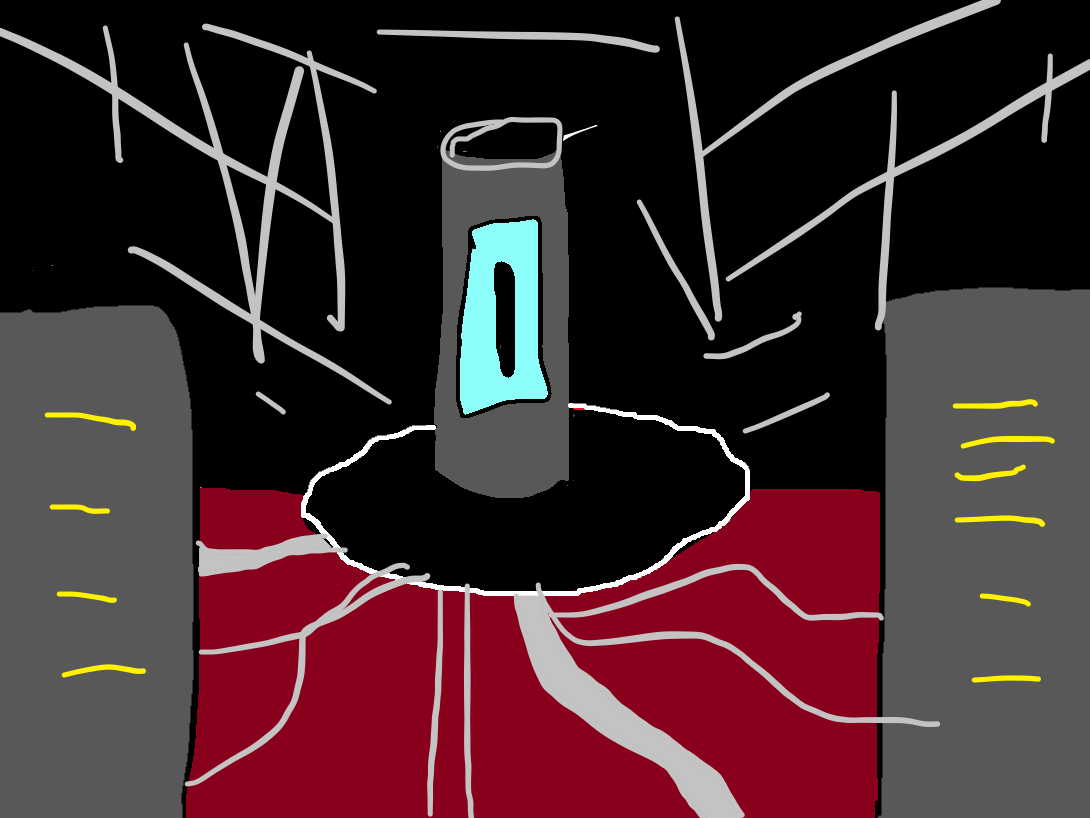

In [ ]:
img_in

In [ ]:
# @title Adjust Parameters
seed = 2110101 # @param {type:"integer"}
torch.cuda.manual_seed(seed)
sentence_1 = 'Vessel with fluid inside, dim light, highres' # @param {type:"string"}
sentence_2 = '((Control room)), buttons and panel, perfectly designed' # @param {type:"string"}
sentence_3 = 'futuristic interior, ultra detailed, nicely ordered wires on floor' # @param {type:"string"}
style = '((Hyperrealistic)) ((Cinematic)) ((Dramatic))' # @param {type:"string"}

prompt = ', '.join([sentence_1, sentence_2, sentence_3, style])
negative_prompt = 'Deformed, poor design, pipe, bad shape, unknown figures' # @param {type:"string"}

if len(negative_prompt) == 0:
  negative_prompt = None
num_inference_steps = 25 # @param {type:"slider", min:20, max:50, step:5}
guidance_scale = 7.5 # @param {type:"slider", min:0, max:10, step:0.5}
img = img2img(prompt=prompt,
              image=img_in,
              num_inference_steps=num_inference_steps,
              guidance_scale=guidance_scale,
              negative_prompt=negative_prompt).images[0]

  0%|          | 0/20 [00:00<?, ?it/s]

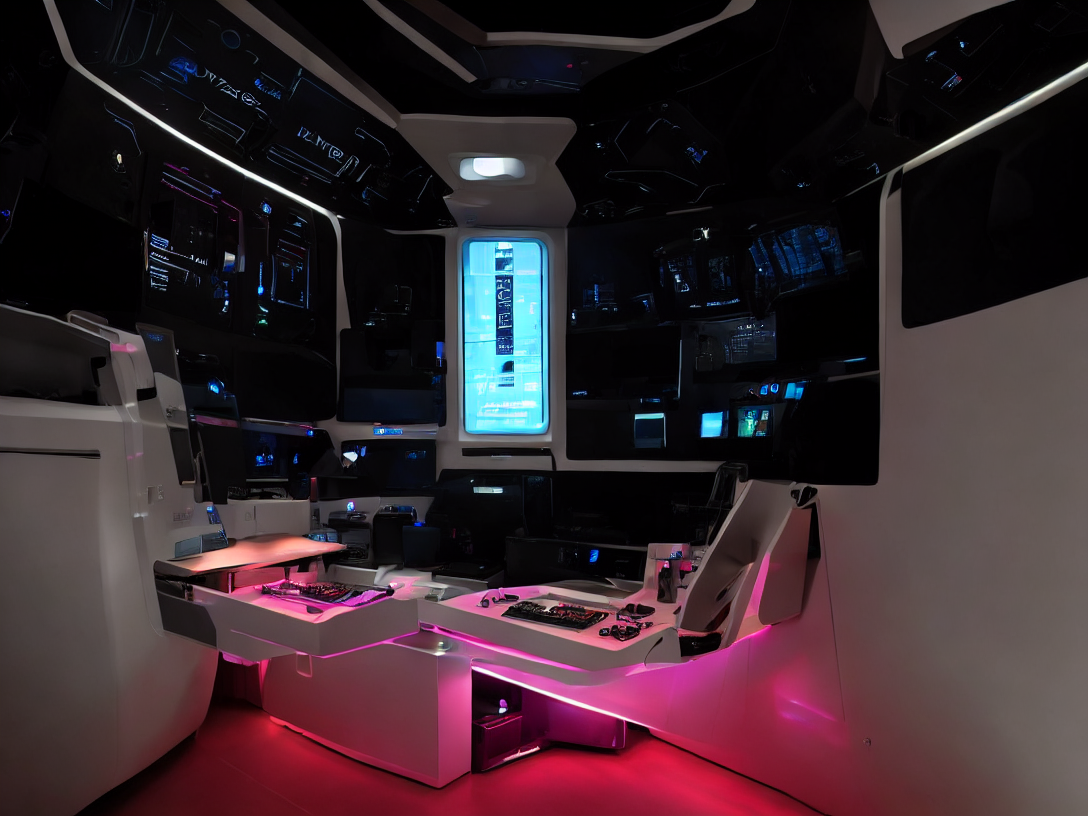

In [ ]:
img